In [1]:
import pandas as pd
df = pd.read_excel('lophoc.xlsx')
df
# trong cay quyet dinh node dai dien cho cac thuoc tinh dac trung cho cac input
# ket qua quyet dinh la cac node la


,Sức khỏe,Thời tiết,Kết quả
0,ốm,u ám,có
1,ốm,mưa,có
2,ốm,nắng,không
3,ốm,u ám,có
4,tốt,u ám,không
5,tốt,mưa,không
6,tốt,nắng,có


In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [3]:
from sklearn import preprocessing
encHealth = preprocessing.LabelEncoder()
df['Sức khỏe'] = encHealth.fit_transform(df['Sức khỏe'])

encW = preprocessing.LabelEncoder()
df['Thời tiết'] = encHealth.fit_transform(df['Thời tiết'])

encR = preprocessing.LabelEncoder()
df['Kết quả'] = encHealth.fit_transform(df['Kết quả'])
df

,Sức khỏe,Thời tiết,Kết quả
0,1,2,0
1,1,0,0
2,1,1,1
3,1,2,0
4,0,2,1
5,0,0,1
6,0,1,0


In [4]:
# tập đặc trưng
feature = ['Sức khỏe', 'Thời tiết']
X = df[feature].values
Y = df['Kết quả'].values

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=25)
X_train

array([[1, 0],
       [0, 0],
       [0, 1],
       [1, 1],
       [0, 2]])

In [31]:
modelDT = DecisionTreeClassifier(criterion='entropy', max_depth=3)
modelDT = modelDT.fit(X_train, Y_train)

[Text(0.625, 0.875, 'Thời tiết <= 1.5\nentropy = 0.971\nsamples = 5\nvalue = [2, 3]'),
 Text(0.5, 0.625, 'Sức khỏe <= 0.5\nentropy = 1.0\nsamples = 4\nvalue = [2, 2]'),
 Text(0.5625, 0.75, 'True  '),
 Text(0.25, 0.375, 'Thời tiết <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.125, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.375, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.75, 0.375, 'Thời tiết <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.625, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.875, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.75, 0.625, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6875, 0.75, '  False')]

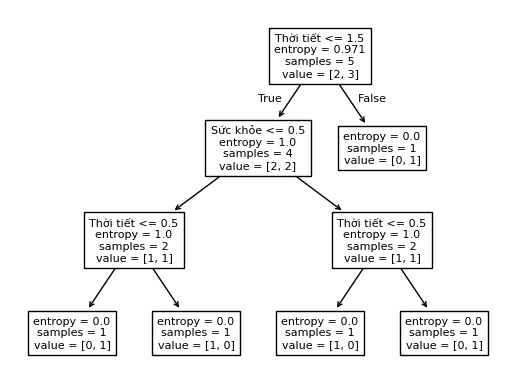

In [32]:
from sklearn.tree import plot_tree
plot_tree(modelDT, feature_names= feature, fontsize= 8)

In [34]:
# Accuracy
Y_test_p = modelDT.predict(X_test)
metrics.accuracy_score(Y_test, Y_test_p)

0.0

In [35]:
# Cònusion Metric
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(Y_test,Y_test_p)
cf

array([[0, 2],
       [0, 0]])

<H1> Hahahah</H1>

In [ ]:
# Xây dựng chương trình dự báo
# người dùng nhập từ bàn phím SK và TT. dự báo trạng thái lớp học